In [2]:
import pandas as pd
url = 'http://www.kbreport.com' #다른 이름으로 저장
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [3]:
baseball = tables[0]

In [4]:
#base = baseball.set_index('팀명',inplace=True)#return 없이 자체적으로 바꾸기, 2번 실행하면 에러
base = baseball.set_index('팀명')

In [5]:
data = base.drop(columns='연속')
data.shape

(10, 8)

In [6]:
#2차원으로 변환한 후 k개로 클러스터링
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [7]:
#k means 로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
group = km.predict(data_pca)

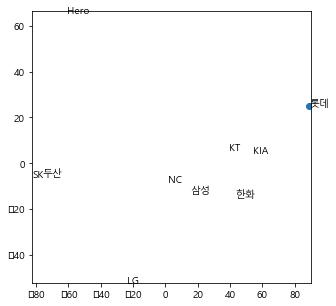

In [10]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5,5))
plt.xlim(data_pca[:,0].min(),data_pca[:,0].max()+1)
plt.ylim(data_pca[:,1].min(),data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i])
plt.scatter(data_pca[i,0], data_pca[i,1])